In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os
import glob
%matplotlib inline

<class 'numpy.ndarray'> (540, 960, 3)


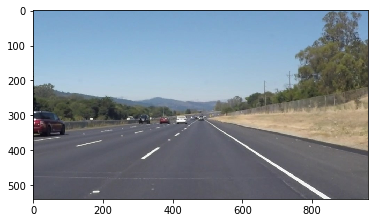

In [5]:
# reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
print(type(image),image.shape)
plt.imshow(image)

In [6]:
os.listdir("test_images/")

['solidWhiteRight.jpg',
 'YellowWhite2.jpg',
 'YellowUnderShade2.jpg',
 'whiteCarLaneSwitch.jpg',
 'YellowUnderShade.jpg',
 'solidYellowLeft.jpg',
 'solidWhiteCurve.jpg',
 'YellowWhite.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg']

# Display Image Function

In [7]:
def show_images(images, cols=3, save=False, title="Default"):
    cmap = None
    columns = cols
    rows = (len(images) + 1)//cols
    
    plt.figure(figsize=(10,12))
    for i,image in enumerate(images):
        plt.subplot(rows,columns,i+1)
        if len(image.shape) == 2:
            cmap = 'gray'
        plt.subplot(rows,cols,i+1)
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    if save:
        plt.savefig("image_output/"+ title + '.png')
    plt.show()

# Visualise Images

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


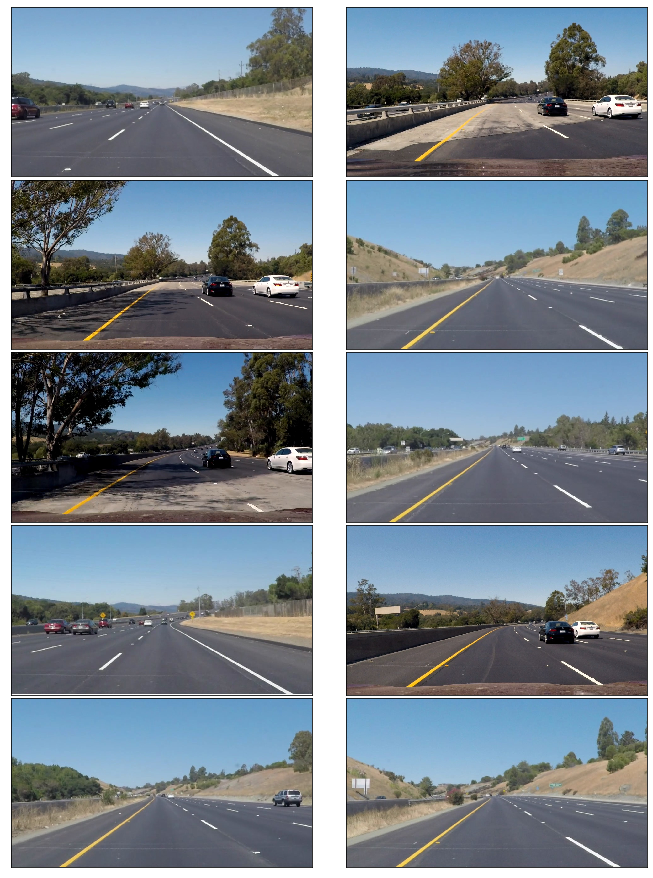

In [13]:
input_images = [mpimg.imread(img_path) for img_path in glob.glob("test_images/*")]
show_images(input_images,cols=2, save=True, title='InputImages')

# View Grayscale Image

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


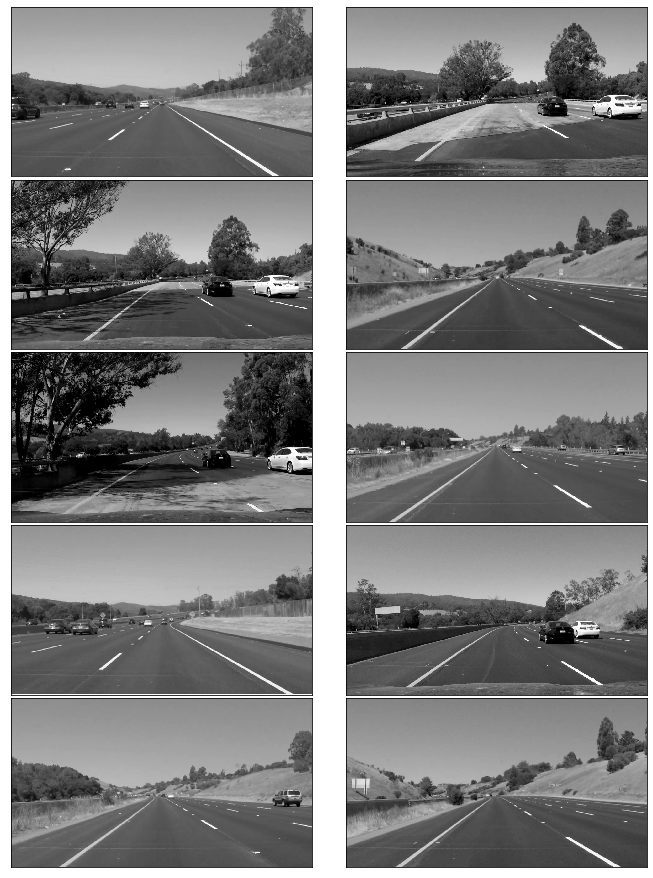

In [14]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
grayScale_images = list(map(grayscale,input_images))
show_images(grayScale_images, cols=2, save=True, title='grayScale_images')


# Gaussian Blur Images 

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


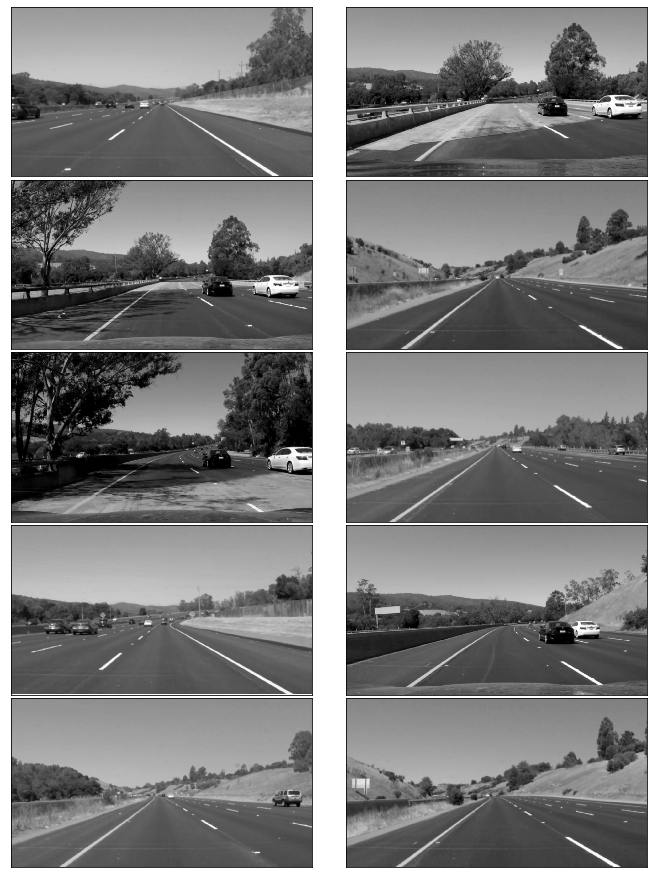

In [17]:
def gaussian_blur(img, kernel_size=5):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
gaussianBlur_images = list(map(gaussian_blur, grayScale_images))
show_images(gaussianBlur_images, cols=2, save=True, title='Gaussian_Blur')


# Canny Edge Detection 

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


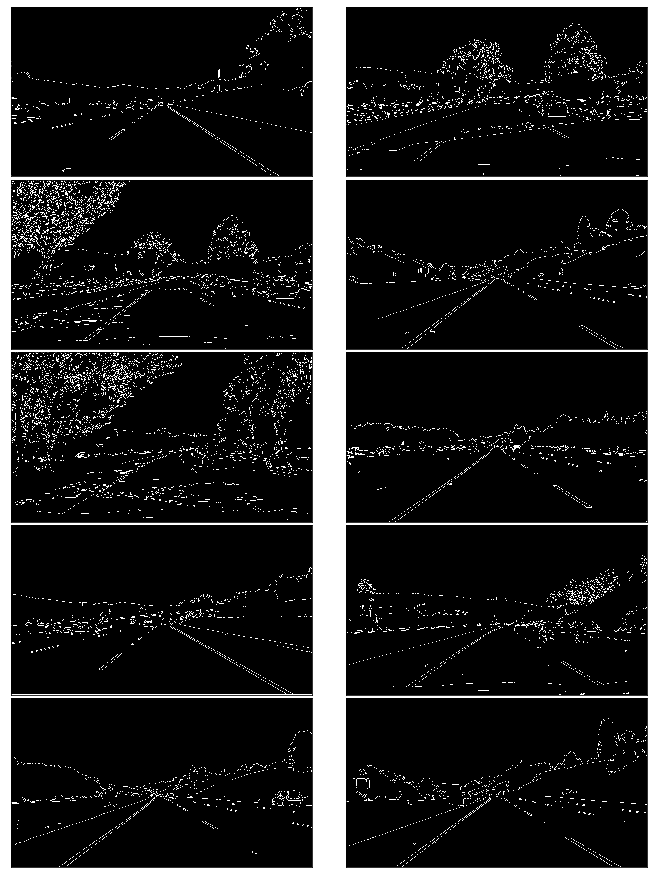

In [18]:
def canny(img, low=50, high=150):
    return cv2.Canny(img, low, high)
edge_detection = list(map(canny, gaussianBlur_images))
show_images(edge_detection, cols=2, save=True, title='CannyEdge_image')

# Region of Interest mask

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


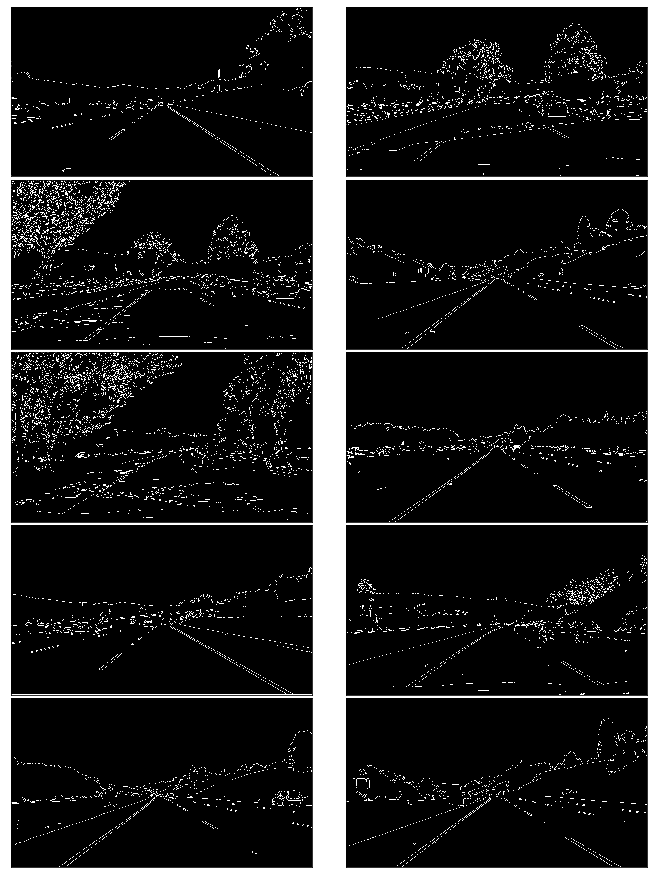

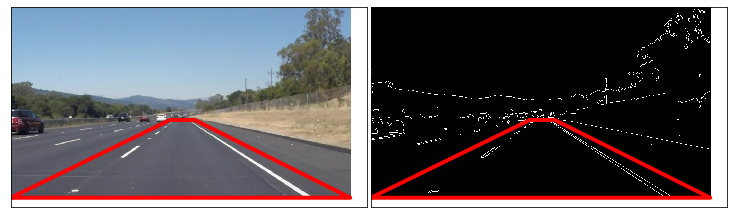

In [20]:
def region_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape)>2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def visualise_region(image):
    dims = image.shape
    colour_select = np.copy(image)
    line_select = np.copy(image)
    
    grayscale_img = grayscale(image)
    lowpass = gaussian_blur(grayscale_img)
    canny_img = canny(lowpass)
    
    #Define cordinates for region
    left_bottom = [0, dims[0]]
    left_top = [450, 320]
    right_top = [520, 320]
    right_bottom = [dims[1], dims[0]]
    
    plt.figure(figsize=(10,12))
    #left
    plt.subplot(1,2,1)
    plt.imshow(image)
    x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0] ,left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1] ,left_bottom[1]]
    plt.plot(x, y, 'r-', lw=4)
    plt.xticks([])
    plt.yticks([])
    #right
    plt.subplot(1,2,2)
    plt.imshow(canny_img, cmap='gray')
    x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0] ,left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1] ,left_bottom[1]]
    plt.plot(x, y, 'r-', lw=4)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig('image_output/ROI_visual.png')
    plt.show()
    
    
def region_selection(image):
    dims = image.shape
    vertices = np.array([[(0,dims[0]),(450, 320),(520, 320),(dims[1], dims[0])]], dtype=np.int32)
    return region_interest(image, vertices)

ROI_edgeDetection = list(map(region_selection,edge_detection))
show_images(edge_detection, cols =2, save=True, title='ROI_canny')
visualise_region(input_images[0])

# Hough Transform

/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


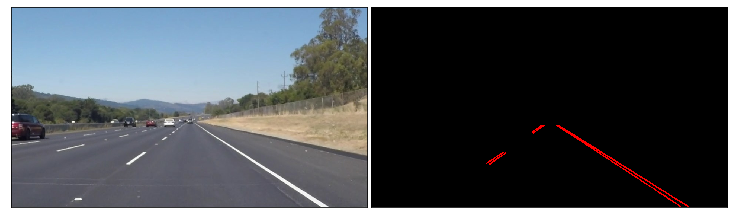

In [22]:
def draw_lines(img, lines, color=[255,0,0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1,y1), (x2,y2), color, thickness)

def hough_lines_basic(img, rho=2, theta=np.pi/180, threshold=20, min_line_len=25, max_line_gap=10):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

raw_hough_image = list(map(hough_lines_basic, ROI_edgeDetection))
print_items = []
print_items.append(input_images[0])
print_items.append(raw_hough_image[0])
show_images(print_items, cols=2, save=True, title='hough_tranform' )
    

In [23]:
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)
        

In [29]:
def line_2_points(y1,y2,line):

    if len(line) != 2:
        return None
    
    gradient, intercept = line
    x1 = int((y1 - intercept)/gradient)
    x2 = int((y2 - intercept)/gradient)
    y1 = int(y1)
    y2 = int(y2)
    
    return((x1,y1), (x2,y2))
    
    
            
def draw_lane_lines(img, lines, color=[255, 0, 0], thickness=15):
    
    #Use function to find the average line from 
    #esemble of lines from the hough transform
    left_line, right_line = calculate_average_lines(lines)
    
    #Want the lane lanes to extend from the bottom of the image
    #to a set amount in the y dimension
    start_lane_line = img.shape[0]
    end_lane_line = img.shape[0]*0.6
    
    left_lane = line_2_points(start_lane_line, end_lane_line, left_line)
    right_lane = line_2_points(start_lane_line, end_lane_line, right_line)
    
    #Draw the two lanes
    cv2.line(img, *left_lane, color, thickness)
    cv2.line(img, *right_lane, color, thickness)
    
       
    
def calculate_average_lines(lines):
    
    left_lane_lines = []
    left_line_distances = []
    right_lane_lines = []
    right_line_distances = []
    
    for i,line in enumerate(lines):
        for x1,y1,x2,y2 in line:
            if (x1==x2 or y1==y2):
                #If we incounter a horiztonal or vertical line
                #then continue to next iteration
                continue
            #Calcuate attributes of the line
            gradient = (y2-y1)/(x2-x1)
            intercept = y2 - gradient*x2
            l2_distance = np.sqrt((y2-y1)**2 + (x2-x1)**2)
            
            if gradient > 0:
                right_lane_lines.append((gradient, intercept))
                right_line_distances.append(l2_distance)
            else:
                left_lane_lines.append((gradient, intercept))
                left_line_distances.append(l2_distance)
                
            
    right_sum_dis = np.sum(right_line_distances)
    left_sum_dis = np.sum(left_line_distances)
            
    right_line_distances = np.asarray(right_line_distances)
    right_line_distances = np.asarray(right_line_distances)
    
    weights_right = right_line_distances / right_sum_dis
    weights_left = left_line_distances / left_sum_dis
    
    average_right_lane = np.dot(weights_right, right_lane_lines)
    average_left_lane = np.dot(weights_left, left_lane_lines)
    
    return average_left_lane, average_right_lane
                
def hough_lines(img, rho=2, theta=np.pi/180, threshold=20, min_line_len=25, max_line_gap=10):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lane_lines(line_img, lines)
    return line_img


def lane_line_process(image):
    
    #Reduce image to single grayscale dimension
    gray_image = grayscale(image)
    #get image dimensions
    dims = gray_image.shape
    
    #Set kernel size and apply gaussian smoothing (aka low pass filter)
    kernel_size = 5
    low_pass_image = gaussian_blur(gray_image, kernel_size)
    
    #Define the parameters and apply canny edge detection algorithm
    low_threshold = 50
    high_threshold = 150
    edge_image = canny(low_pass_image, low_threshold, high_threshold)
    
    #Define the vertices and apply a mask to the edge detected image (4sided polygon)
    vertices = np.array([[(0,dims[0]),(450, 320),(520, 320),(dims[1], dims[0])]], dtype=np.int32)
    mask_image = region_interest(edge_image, vertices)
    
    #Define paramters and apply hough
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 20    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 25 #minimum number of pixels making up a line
    max_line_gap = 10    # maximum gap in pixels between connectable line segments

    image_lines = hough_lines(mask_image, rho, theta, threshold, min_line_length, max_line_gap)
    
    
    final_result = weighted_img(image_lines, image)
    
    return final_result


/home/vaishnavi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


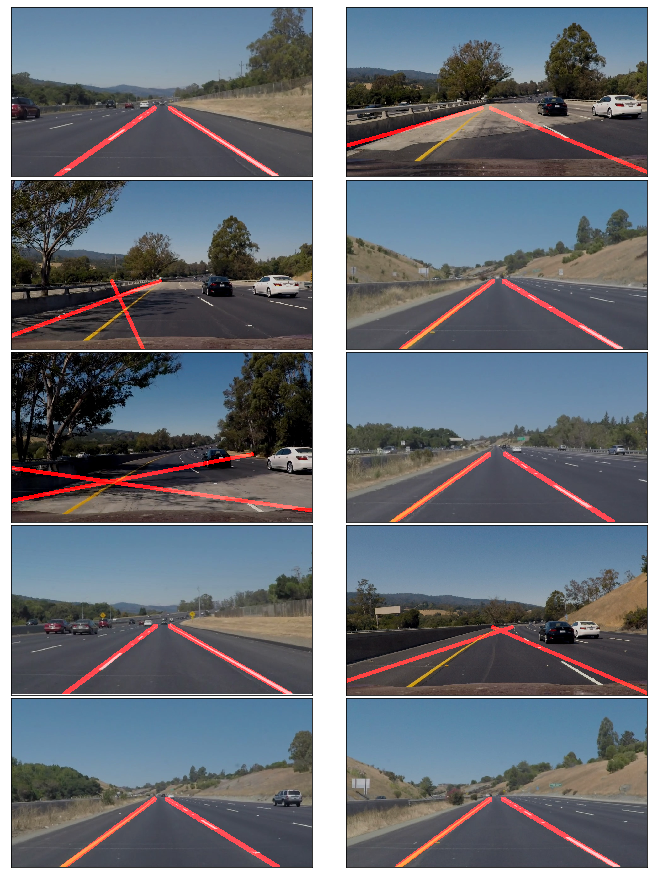

In [31]:
detected_lanes = list(map(lane_line_process,input_images))
show_images(detected_lanes, cols=2, save=True, title="Pipeline")